In [121]:
import os
import numpy as np
import cv2
import albumentations as a

In [109]:
import matplotlib.pyplot as plt

def plot_image(images, rows=None, cols=None):
    if isinstance(images, np.ndarray):
        # Call the original plot_image function
        plt.imshow(images)
        plt.show()
    else:
        fig, axs = plt.subplots(rows, cols, figsize=(20,20))
        for i, img in enumerate(images):
            ax = axs[i // cols, i % cols]
            ax.imshow(img)
        plt.show()

In [2]:
data_path = '../dataset/clean_merged_split_convert-augment/test-augment/'

In [129]:
# corrupted = '/kaggle/working/dataset/clean_data_splitted_convert/train/ra/000021.jpg'
corrupted = '../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/train/ra/000021.jpg'
os.remove(corrupted)
print('corrupted data removed')

corrupted data removed


In [132]:
from albumentations import (
    Compose, Rotate, RandomScale, GaussianBlur
)

# do augmentation 5 times with 1 image
repeat = 5

# loop through base folder -> splitted data folder -> class folder -> img
def augment_and_save_images(aug, input_folder, output_folder):
    for split_folder in os.listdir(input_folder):
        split_input_folder = os.path.join(input_folder, split_folder)
        split_output_folder = os.path.join(output_folder, split_folder)
        os.makedirs(split_output_folder, exist_ok=True)
        
        for class_folder in os.listdir(split_input_folder):
            class_input_folder = os.path.join(split_input_folder, class_folder)
            class_output_folder = os.path.join(split_output_folder, class_folder)
            os.makedirs(class_output_folder, exist_ok=True)
            
            for image_name in os.listdir(class_input_folder):
                image_path = os.path.join(class_input_folder, image_name)
                img = cv2.imread(image_path)
                data = {'image': img}
                img_base, ext = os.path.splitext(image_name)
                
                # check progress
                print(class_input_folder+'/'+image_name)
                
                for i in range(repeat):
                    aug_data = aug(**data)
                    augmented_image = aug_data['image']
                    output_path = os.path.join(class_output_folder, img_base+f'-{i}'+ext)
                    cv2.imwrite(output_path, augmented_image)

aug = Compose([
    Rotate(limit=15, p=1),
    RandomScale(scale_limit=0.7, p=1),
    GaussianBlur(p=1)
], p=1)

# input_folder = '../dataset/clean_merged_split_convert_augment/test-augment/'
# output_folder = '../dataset/clean_merged_split_convert_augment/test-augment-result/'

input_folder = '../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/'
output_folder = '../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert_augment/'

augment_and_save_images(aug, input_folder, output_folder)

../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000001.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000002.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000003.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000005.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000006.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000007.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000008.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000009.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000010.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_convert/test\ba/000011.jpg
../dataset/clean_merged_split_convert_augment/clean_data_splitted_conv

## Augmentation Example

original image: (300, 306, 3)


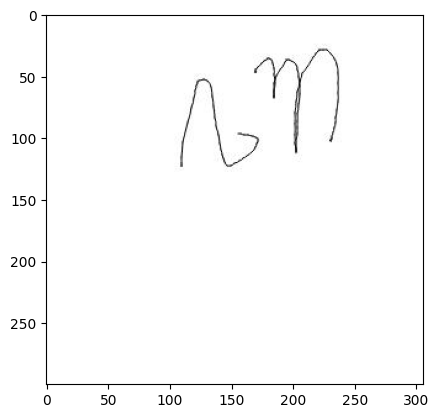

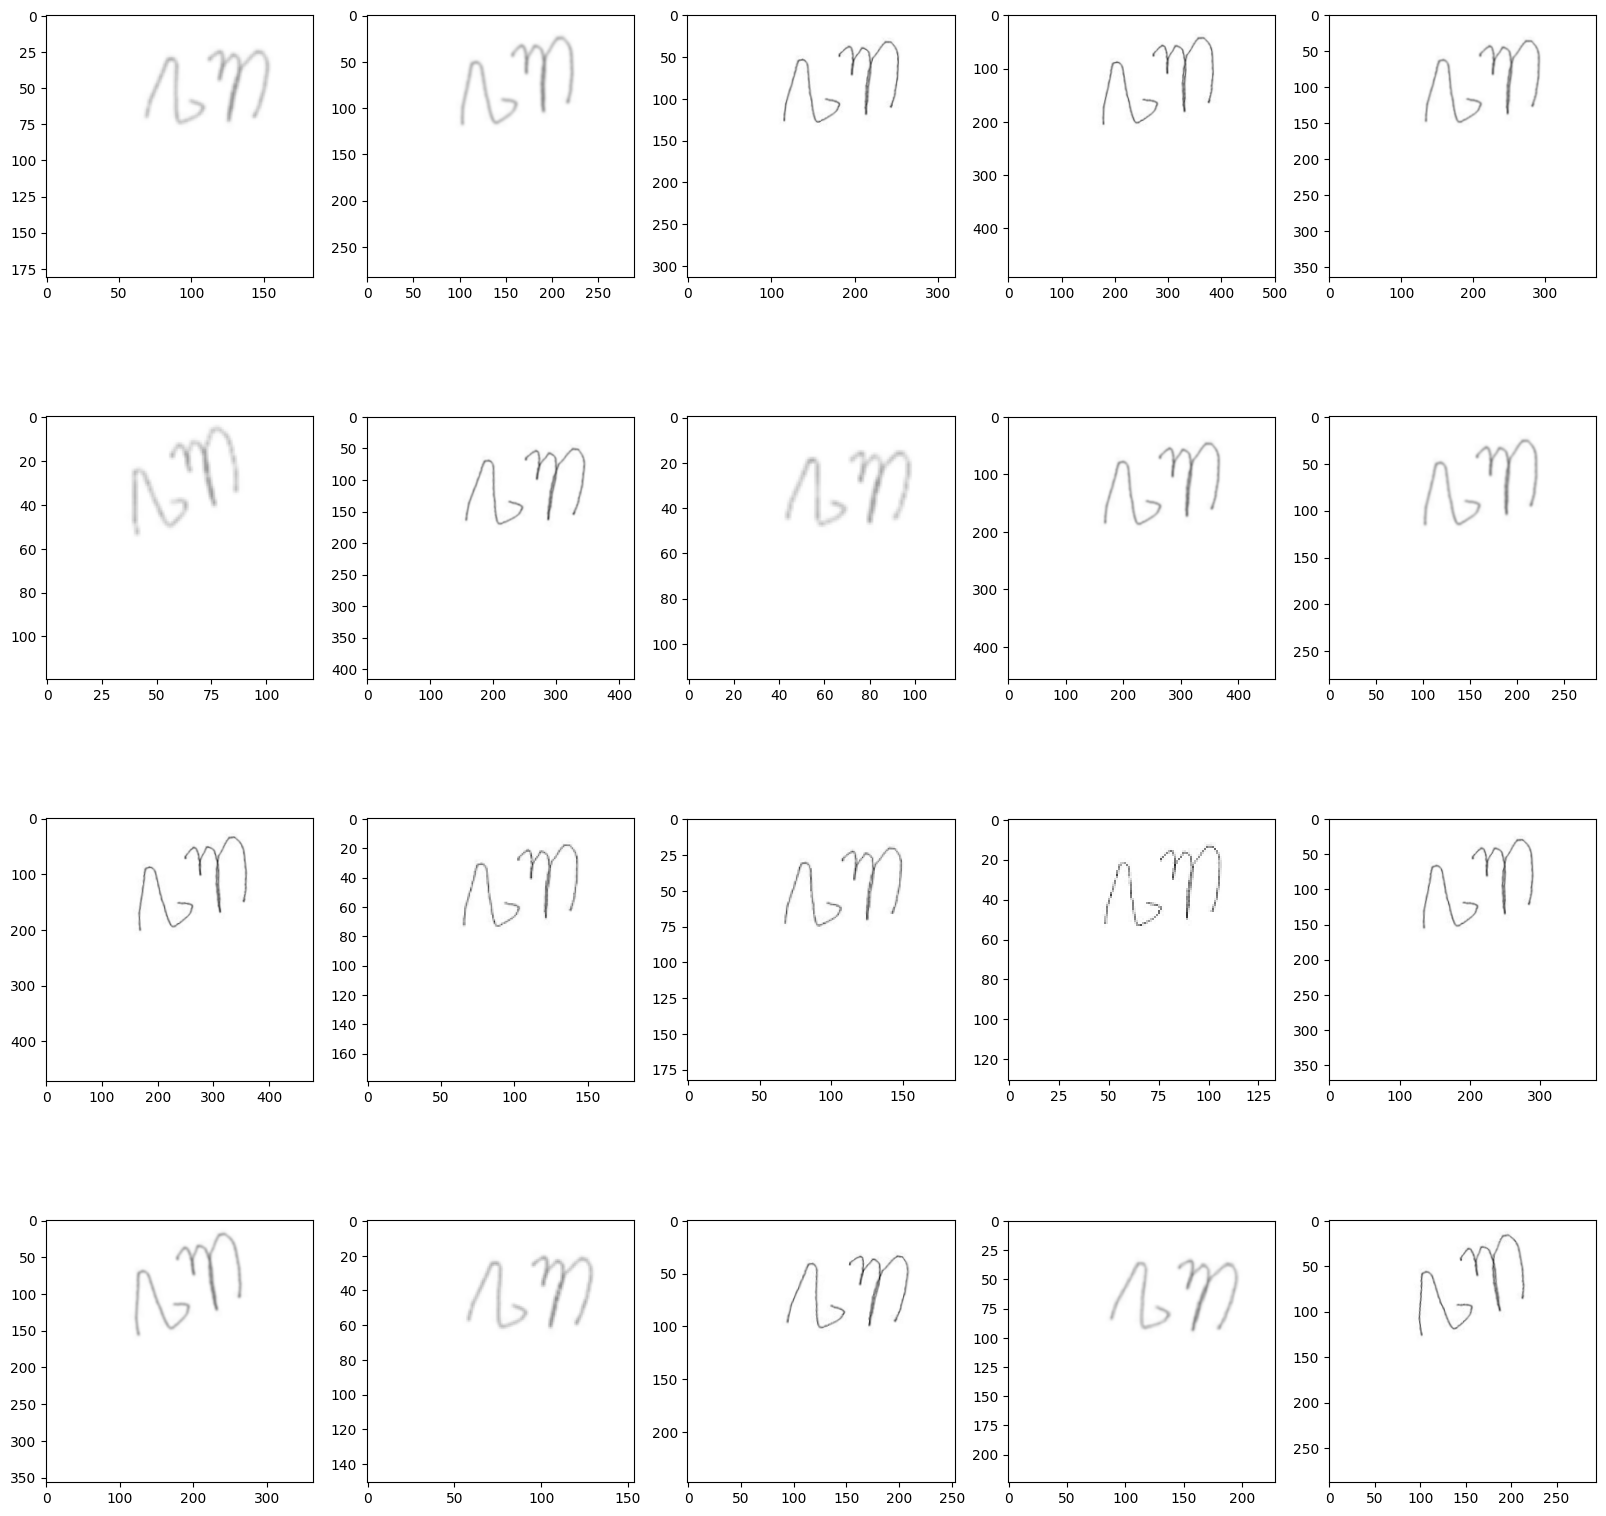

In [110]:
img_path = '../dataset/clean_merged_split_convert_augment/test-augment/ba/000001.jpg'
img_size = 300
img = cv2.imread(img_path)
# img = cv2.resize(img, (img_size,img_size))
print('original image:', img.shape)
plot_image(img)

img_list = []

aug = Compose([
    Rotate(limit=15, p=1),
    RandomScale(scale_limit=0.7, p=1),
    GaussianBlur(p=0.7)
    # Defocus(p=0.7)
    # MotionBlur(p=1)
], p=1)

for i in range(20):
  img = cv2.imread(img_path)
  data = {'image': img}
  # img = img.astype(np.uint8)
  # img = cv2.resize(img, (img_size,img_size))
  aug_data = aug(**data)
  img_aug = aug_data['image']
  
  img_list.append(img_aug)

plot_image(img_list, 4, 5)